---  

* Applied machine learning is basically feature engineering - Andrew Ng 

---


**Özellik Mühendisliği:**  
* Özellikler üzerinde gerçekleştirilen çalışmalar. Ham veriden değişken üretmek.  

**Veri Ön İşleme:**
* Çalışmalar öncesi verinin uygun hale getirilmesi sürecidir.  




# Outliers

* Verideki genel eğiliminin oldukça dışına çıkan değerlere aykırı değer denir. 

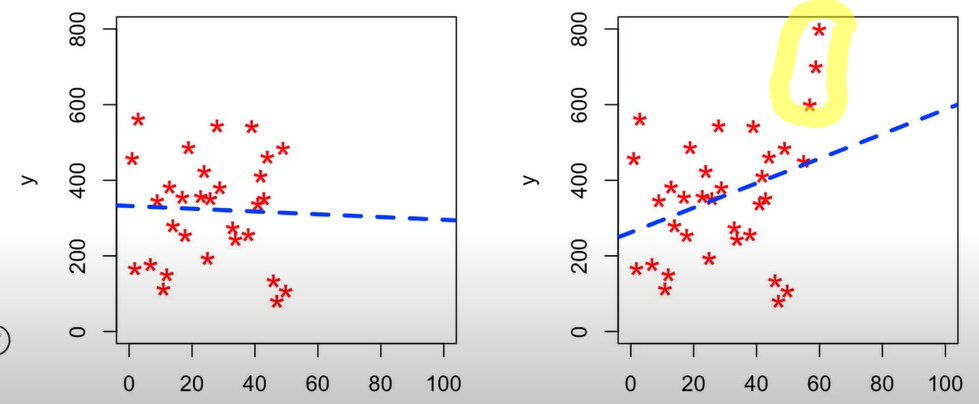

* Aykırı değer tespit yöntemleri;
> 1. Sektör Bilgisi 
> 2. Standart Sapma Yaklaşımı 
> 3. Z-Skoru Yaklaşımı 
> 4. Boxplot Yöntemi

## Aykırı Değerleri Yakalama

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
# Büyük ölçekli data

def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data
df = load_application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Küçük ölçekli data

def load():
    data = pd.read_csv("titanic.csv")
    return data
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


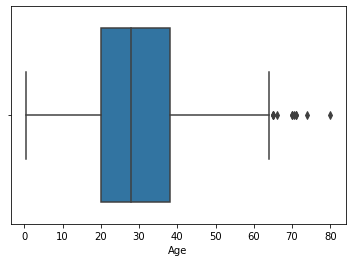

In [5]:
# Boxplot
sns.boxplot(df.Age)
plt.show()

In [6]:
# "Age" kolonu için IQR hesapları

q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR = q3 - q1

upper = q3 + 1.5 * IQR 
lower = q1 - 1.5 * IQR

filter1 = (df.Age < lower) | (df.Age > upper) # Sınırlarımızın dışındaki değerler (outliers)
df[filter1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


In [7]:
# Aykırı değerlerin index bilgileri 

df[filter1].index

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [8]:
# Hiç aykırı değer var mı?

df[filter1].any(axis=None) # Satır veya sütuna değil tüm dataya bakar. True/False döner

True

---  

>> 1. Eşik değer belirledik. 
>> 2. Aykırılara eriştik. 
>> 3. Hızlıca aykırı değer var mı yok mu diye sorduk.  

---  



## İşlemleri Fonksiyonlaştırma

### Sınırları Belirleyen Func.

In [9]:
# Sınırları belirleyen fonksiyon

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [10]:
outlier_thresholds(df, "Age") # Low, up

(-6.6875, 64.8125)

In [11]:
outlier_thresholds(df, "Fare") # Low, up

(-26.724, 65.6344)

### Aykırı değer var mı? Func.

In [12]:
# Aykırı değer var mı yok mu fonksiyonu

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    filter1 = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    return dataframe[filter1].any(axis=None) # True/False --> Outlier Var mı? Yok mu?

check_outlier(df, "Age"), check_outlier(df, "Fare")

(True, True)

In [13]:
# Büyük ölçekli data

dff = load_application_train()
dff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Değişkenleri Ayıklama

In [14]:
# Değişkenleri ayıklama

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """
    
    #cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    
    # Encoding halde tutulan ve "cat_th" den daha az unique değişkene sahip cat. değişkenler
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < cat_th]
    
    # "Name" gibi object olmasına rağmen kategorik olmayan yani her değer birbiriyle bağımsız olabilecek kapasitede. Bir anlam ifade etmeyen
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype == "O" and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat # Kategorik + Encoding Cat.
    cat_cols = [col for col in cat_cols if col not in cat_but_car] # Cardinal olanları ayıkla
    
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 
    num_cols = [col for col in num_cols if col not in num_but_cat] # Encoding cat. değişkenleri ayıkla
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car
    
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("\n")
print("#"*5)
print(cat_cols)
print("#"*5)
print(num_cols)
print("#"*5)
print(cat_but_car)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


#####
['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']
#####
['PassengerId', 'Age', 'Fare']
#####
['Name', 'Ticket', 'Cabin']


In [15]:
# Numeric olup encoding yapıldığına karar verip Cat_cols olan değişkenler

print(df.Survived.value_counts())
print(df.Pclass.value_counts())
print(df.Parch.value_counts())

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [16]:
num_cols

['PassengerId', 'Age', 'Fare']

In [17]:
# PassengerID kolonu index gibi olduğu için drop edebiliriz.
df[num_cols].head()

# Drop ettik.
num_cols = [col for col in num_cols if col != "PassengerId"]

In [18]:
# Elde ettiğimiz numeric kolonlar üzerinde boxplot ile outlier kontrolü

for col in num_cols:
    print(col,"-->" ,check_outlier(df, col))
    
# 2 kolonumuzda da outlier var

Age --> True
Fare --> True


#### Büyük Data Set

In [19]:
# Ayıklama yapıyoruz.

cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [20]:
# Numeric kolonlar üzerinde outlier kontrolü

for col in num_cols:
    print(col, "--->", check_outlier(dff, col))

SK_ID_CURR ---> False
CNT_CHILDREN ---> True
AMT_INCOME_TOTAL ---> True
AMT_CREDIT ---> True
AMT_ANNUITY ---> True
AMT_GOODS_PRICE ---> True
REGION_POPULATION_RELATIVE ---> True
DAYS_BIRTH ---> False
DAYS_EMPLOYED ---> True
DAYS_REGISTRATION ---> True
DAYS_ID_PUBLISH ---> False
OWN_CAR_AGE ---> True
CNT_FAM_MEMBERS ---> True
HOUR_APPR_PROCESS_START ---> True
EXT_SOURCE_1 ---> False
EXT_SOURCE_2 ---> False
EXT_SOURCE_3 ---> False
APARTMENTS_AVG ---> True
BASEMENTAREA_AVG ---> True
YEARS_BEGINEXPLUATATION_AVG ---> True
YEARS_BUILD_AVG ---> True
COMMONAREA_AVG ---> True
ELEVATORS_AVG ---> True
ENTRANCES_AVG ---> True
FLOORSMAX_AVG ---> True
FLOORSMIN_AVG ---> True
LANDAREA_AVG ---> True
LIVINGAPARTMENTS_AVG ---> True
LIVINGAREA_AVG ---> True
NONLIVINGAPARTMENTS_AVG ---> True
NONLIVINGAREA_AVG ---> True
APARTMENTS_MODE ---> True
BASEMENTAREA_MODE ---> True
YEARS_BEGINEXPLUATATION_MODE ---> True
YEARS_BUILD_MODE ---> True
COMMONAREA_MODE ---> True
ELEVATORS_MODE ---> True
ENTRANCES_MODE ---

In [21]:
# "SK_ID_CURR" değişkeni index gibi davranan gereksiz bir kolon bunu drop edelim.

dff[num_cols].head()

num_cols = [col for col in num_cols if col != "SK_ID_CURR"]
dff[num_cols].head(10)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.000,406597.500,24700.500,351000.000,0.019,-9461,-637,-3648.000,-2120,NaN,1.000,10,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,0.015,2.000,2.000,2.000,-1134.000,0.000,0.000,1.000
1,0,270000.000,1293502.500,35698.500,1129500.000,0.004,-16765,-1188,-1186.000,-291,NaN,2.000,11,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,0.071,1.000,0.000,1.000,-828.000,0.000,0.000,0.000
2,0,67500.000,135000.000,6750.000,135000.000,0.010,-19046,-225,-4260.000,-2531,26.000,1.000,9,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,-815.000,0.000,0.000,0.000
3,0,135000.000,312682.500,29686.500,297000.000,0.008,-19005,-3039,-9833.000,-2437,NaN,2.000,17,NaN,0.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,0.000,2.000,-617.000,NaN,NaN,NaN
4,0,121500.000,513000.000,21865.500,513000.000,0.029,-19932,-3038,-4311.000,-3458,NaN,1.000,11,NaN,0.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,-1106.000,0.000,0.000,0.000
5,0,99000.000,490495.500,27517.500,454500.000,0.036,-16941,-1588,-4970.000,-477,NaN,2.000,16,NaN,0.354,0.621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,-2536.000,0.000,1.000,1.000
6,1,171000.000,1560726.000,41301.000,1395000.000,0.036,-13778,-3130,-1213.000,-619,17.000,3.000,16,0.775,0.724,0.492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.000,1.000,-1562.000,1.000,1.000,2.000
7,0,360000.000,1530000.000,42075.000,1530000.000,0.003,-18850,-449,-4597.000,-2379,8.000,2.000,16,NaN,0.714,0.541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,0.000,2.000,-1070.000,0.000,0.000,0.000
8,0,112500.000,101961

## Aykırı Değerlere Erişmek

In [22]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10: # Aykırı değer sayısı 10'den fazla ise
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head()) # ilk 5 satırı göster
    else: #Aykırı değer sayısı 10'dan büyük değilse
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))]) # Hepsini getir zaten az var.
    
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index # Outlier değişkenlerin indexleri
        return outlier_index

In [23]:
x = grab_outliers(df, "Age", True)
df.loc[x] # == df.loc[x, :]

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


## Aykırı Değer Problemini Çözme

### Silme

In [24]:
# Alt ve üst sınırlar

low, up = outlier_thresholds(df, "Fare")
df[~((df.Fare < low) | (df.Fare > up))].head(10) # Outlierların DIŞINDAKİLER


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S


In [25]:
# Outlier Silme Fonksiyonu

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

cat_cols,  num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col != "PassengerId"]

print("#-"*10)
print(df.shape)
print("#-"*10)

for col in num_cols:
    new_df = remove_outlier(df, col) # Bu kullanım mantıklı değil. Önce "Age" değişkeni için bir new_df elde ediyoruz.
    # Ardıdan "Fare" değişkeni için bir new_df elde ediyoruz. En son gelen numeric kolonun outlier sayısına göre new_df şekilleniyor.

df.shape[0] - new_df.shape[0]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4
#-#-#-#-#-#-#-#-#-#-
(891, 12)
#-#-#-#-#-#-#-#-#-#-


116

### Baskılama Yöntemi

* Upper Limit üzerimnde kalan outlierların değeri upper limit, lower limit altında kalan outlierlar ise lower limit değerine atanır.

In [26]:
# "Fare" değişkeni için sınırlarımız
low, up = outlier_thresholds(df, "Fare") # low:-26.72 - up:65.63

df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"].head(10) # outlier "Fare" değerleri
# Toplam 116 tane outlier "Fare" değerimiz var.

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
Name: Fare, dtype: float64

In [27]:
# Klasik Yöntem

df.loc[(df["Fare"] > up), "Fare"] = up
df.loc[(df["Fare"] < low), "Fare"] = low

In [28]:
# List Comprehension ile Outlier "Fare" değerlerini baskılıyorum.

df["Fare"] = df["Fare"].apply(lambda x: up if x > up else low if x < low else x)

# --> Alternatif List Comprehension 2
#df["Fare"] = df.apply(lambda x: up if (x["Fare"] > up) else (low if (x["Fare"] < low) else x["Fare"]), axis=1)

In [29]:
# Baskılama yöntemi ile doldurma için FONKSİYON

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [30]:
# Veri setimizi baştan çağırarak bir deneyelim

df = load()

cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if col not in "PassengerId"]

print("\n\n")
# Outlier var mı?
print("Before:\n")
for col in num_cols:
    print(col, "--->", check_outlier(df, col))


for col in num_cols: # Baskılama fonksiyonu ile atama yapıyoruz.
    replace_with_thresholds(df, col)

# Tekrar soruyoruz. Outlier var mı?
print("\nAfter:\n")
for col in num_cols: # Artık outlierlar baskılandı
    print(col, "--->", check_outlier(df, col))
    

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4



Before:

Age ---> True
Fare ---> True

After:

Age ---> False
Fare ---> False


### Recap

* df = load()
* outlier_thresholds(df, "Age")
* check_outlier(df, "Age")
* grab_outliers(df, "Age", index=True)

---  

* remove_outlier(df, "Age")
* replace_with_thresholds(df, "Age")
* check_outlier(df, "Age")

## Çok Değişkenli Aykırı Değer Analizi (Local Outlier Factor)

* 17 Yaşında 3 kere evlenmek aykırılıktır. Bunun gibi durumları birlikte ele alma işlemine LOF denir.

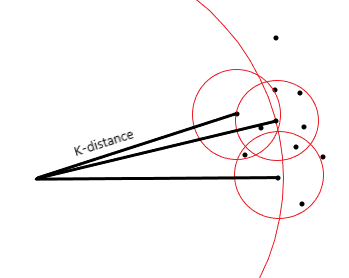

* LOF Yöntemi; gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer tanımı yapabilmemizi sağlar.  
* Bir noktanın Local Yoğunluğu, ilgili noktanın etrafındaki komşuluklar demektir. 
* Noktanın yoğunluğu etrafındaki noktaların yoğunluğundan daha düşük ise bu nokta daha seyrek bir konumdadır.

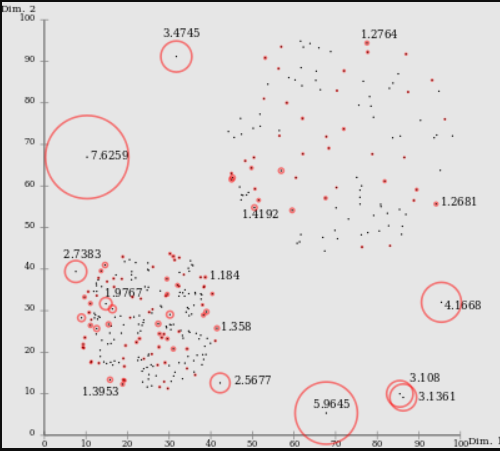

* Verilen skor 1'e ne kadar yakın olursa o kadar iyidir. 
* 1'den uzaklaştıkça ilgili gözlem outlier olabilir. 
* İlgili skorlar için bir threshold belirleyip, outlier tespit edilebilir.

In [31]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include=["float64", "int64"])
df = df.dropna()

print(df.shape)

df.head()

(53940, 7)


,carat,depth,table,price,x,y,z
0,0.230,61.500,55.000,326,3.950,3.980,2.430
1,0.210,59.800,61.000,326,3.890,3.840,2.310
2,0.230,56.900,65.000,327,4.050,4.070,2.310
3,0.290,62.400,58.000,334,4.200,4.230,2.630
4,0.310,63.300,58.000,335,4.340,4.350,2.750


In [32]:
# Aykırı değer var mı?

for col in df.columns:
    print(col, "--->", check_outlier(df, col))

carat ---> True
depth ---> True
table ---> True
price ---> True
x ---> True
y ---> True
z ---> True


In [33]:
# "carat" değişkeninde kaç tane outlier var?

low, up = outlier_thresholds(df, "carat")
df[((df["carat"] < low) | (df["carat"] > up))].shape

(1889, 7)

In [34]:
# "depth" değişkeninde kaç tane outlier var?

low, up = outlier_thresholds(df, "depth")
df[((df["depth"] < low) | (df["depth"] > up))].shape

(2545, 7)

---

**NOT**
> * Eğer bu senaryoda boxplot ile bu outlierları (2545, 1889) atacak olsaydık büyük bir veri kaybı yaşamış olurduk. 
> * Bu outlierlara baskılama yöntemi uygulasaydık gereksiz gürültü eklemiş olucaktık. 
> * Daha az veri kaybı yaşamak için LOF yöntemiyle yaklaşım en doğrusu olacaktır.

---

In [35]:
# LOF nesnesi oluşturduk.

clf = LocalOutlierFactor(n_neighbors=20) # 20 komşuya bak
clf.fit_predict(df) # Nesnemizi datamıza uyguladık. Skorları elde ettik.


array([-1, -1, -1, ...,  1,  1,  1])

In [36]:
df_scores = clf.negative_outlier_factor_ # LOF Skorları tuttuk.
# df_scores = -df_scores
df_scores[:7] # Değerlerin -1'e yakın olmasını dikkate alacağız.

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162])

In [37]:
# En kötü 5 skora bakalım

np.sort(df_scores)[0:5]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

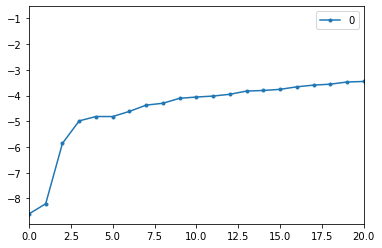

In [38]:
# Skorları elde ettik. Artık yapmamız gereken şey bir threshold belirlemek.
# Bunu elbow yöntemiyle belirleyeceğiz.

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style=".-")
plt.show()

---  

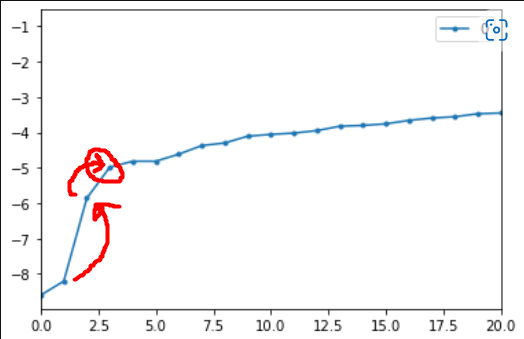

> * -6'dan -5'e geçiş keskindir. Ve diğer tüm noktalar birbirine yakın olduğu için bu noktayı seçtik.

In [39]:
# Belirlediğimiz threshold 3.indexli değer (4.sıradaki)

th = np.sort(df_scores)[3]
th

-4.984151747711709

In [40]:
# Aykırı değerler

df[df_scores < th] # Threshold değerimizden küçük olan değerler

,carat,depth,table,price,x,y,z
41918,1.030,78.200,54.000,1262,5.720,5.590,4.420
48410,0.510,61.800,54.700,1970,5.120,5.150,31.800
49189,0.510,61.800,55.000,2075,5.150,31.800,5.120


---  

> *Boxplot yöntemiyle yaklaşık 2000 değeri silecekken, LOF ile sadece 3 değeri kaldıracağız. Dolayısıyla daha az veri kaybı yaşamış olduk.*  

---

In [41]:
# Peki neden bu 3 değer aykırı?

df.describe([0.01, 0.05, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


---

> * Depth değişkeninin max değeri 79 olmasına rağmen outlier olarak yakalanan değer 78.20. 
> * Bu değerin diğer değişkenlerle birlikte bir outlier olduğuna karar verildiği için bu durum böyle.
> * LOF etkisi çok net görülüyor.

---

In [42]:
# Outlier değerlerin atılması

print("Outlier index:", df[df_scores < th].index)
df[df_scores < th].drop(df[df_scores < th].index, axis=0)

Outlier index: Int64Index([41918, 48410, 49189], dtype='int64')


,carat,depth,table,price,x,y,z


---  

**NOT**
> * LOF yönteminde baskılama kullanmak mantıksızdır. Çünkü outlier veriler yerine koyacağımız değeri nasıl belirleyeceğiz? 
> * Her değişken için bir değer belirleyip atama yapabiliriz ama böyle tekrar eden veriler oluştumuş oluruz. Datamız kirlenir.

---


# Missing Values

* Eksik veri problemi nasıl çözülür? 
> * Silme 
> * Değer Atama Yöntemleri 
> * Tahmine Dayalı Yöntemler (ML- İstatistiksel modeller ile)

* Eksik veri ile çalışırken dikkat edilmesi gereken nokta <mark>**"Eksik verinin rassallığıdır."**</mark>

## Eksik Değer Yakalama

In [43]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [44]:
# Hiç eksik değer var mı?
df.isnull().values.any()

True

In [45]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [46]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [47]:
# Ne kadarı dolu?
df.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [48]:
# Toplam eksik değer sayısı

df.isnull().sum().sum()

866

In [49]:
# Eksik değerlerin veriye oranı

(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin         77.104
Age           19.865
Embarked       0.224
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64

In [50]:
# Eksik değere sahip değişkenlerin isimleri

na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols

['Age', 'Cabin', 'Embarked']

### Fonksiyonlaştırma

In [51]:
# Fonksiyonlaştırma

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0] # NaN değere sahip değişken isimleri
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False) # NaN değişken sayıları azalan
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0]*100).sort_values(ascending=False) # NaN değerlerin oranı
    missing_df = pd.concat([n_miss,  np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df, end="\n")
    
    if na_name: # Eksik değerlerin isimleri gelsin mi?
        return na_columns

missing_values_table(df)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [52]:
nan_columns = missing_values_table(df, True)
nan_columns

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

## Eksik Değer Problemini Çözme

* Eğer ağaca dayalı yöntemler kullanılıyorsa eksik değerlerin etkisi outliersların etkisi gibi göz ardı edilebilir. 

### Yaklaşım 1: Hızlıca Silmek

In [53]:
df.shape

(891, 12)

In [54]:
# Hızlıca silmek

df.dropna().shape # 891 Değişkenden 183 tane değişken kaldı.

(183, 12)

### Yaklaşım 2: Basit Atama Yöntemleri

In [55]:
# "Age" değişkenini "Age" değişkeninin ortalaması ile doldurma
df.Age.fillna(df.Age.mean())[:20]

0    22.000
1    38.000
2    26.000
3    35.000
4    35.000
5    29.699
6    54.000
7     2.000
8    27.000
9    14.000
10    4.000
11   58.000
12   20.000
13   39.000
14   14.000
15   55.000
16    2.000
17   29.699
18   31.000
19   29.699
Name: Age, dtype: float64

In [56]:
# "Age" değişkenini "Age" değişkeninin medyanı ile doldurma
df.Age.fillna(df.Age.median())[:20]

0    22.000
1    38.000
2    26.000
3    35.000
4    35.000
5    28.000
6    54.000
7     2.000
8    27.000
9    14.000
10    4.000
11   58.000
12   20.000
13   39.000
14   14.000
15   55.000
16    2.000
17   28.000
18   31.000
19   28.000
Name: Age, dtype: float64

In [57]:
# "Age" değişkenini sabit bir değer ile doldurma
df.Age.fillna(999999)[:20]

0        22.000
1        38.000
2        26.000
3        35.000
4        35.000
5    999999.000
6        54.000
7         2.000
8        27.000
9        14.000
10        4.000
11       58.000
12       20.000
13       39.000
14       14.000
15       55.000
16        2.000
17   999999.000
18       31.000
19   999999.000
Name: Age, dtype: float64

In [58]:
# "apply" ve "lambda" ile hızlıca atama

# axis=0 --> apply function to each column
# axis=1 --> apply function to each row
df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0).head()

dff = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

dff.isnull().sum().sort_values(ascending=False) # "Age" değişkenini hallettik.
# Cabin ve Embarked değişkenleri "object"

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [59]:
# Kategorik değişkenler için en mantıklısı "mode" ile doldurmaktır.

# --> "Apply" ve "Lambda"
dff[["Cabin", "Embarked"]].apply(lambda x: x.fillna(x.mode()[0])).head(15)

,Cabin,Embarked
0,B96 B98,S
1,C85,C
2,B96 B98,S
3,C123,S
4,B96 B98,S
5,B96 B98,Q
6,E46,S
7,B96 B98,S
8,B96 B98,S
9,B96 B98,C


In [63]:
# "Object" tipinde ve unique değişken sayısı 10'dan küçük olan yani Cardinal olmayan kolonlardaki Eksik değerleri mode ile doldur

dff.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <=10) else x).head(15) # default axis=0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699,0,0,330877,8.458,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C


#### Kategorik Değişken Kırılımında Değer Atama

* Örneğin erkeklere ait eksik "age" değerlerini erkeklerin ortalaması ile doldur.

In [64]:
df.groupby("Sex")["Age"].mean()

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [65]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).isnull().sum()
# df["Age"] = df.groupby("Age").transform(lambda x: x.fillna(x.mean())

0

### Yaklaşım 3: Tahmine Dayalı Atama İşlemi

* Eksik değere sahip değişkeni "bağımlı" diğerlerini bağımsız kabul ederek modelleme yapacağız.

In [66]:
df = load()

In [67]:
# Değişkenleri yakaladık
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col != "PassengerId"]

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [68]:
## OHE yapmalıyız.

dff = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,1,0,1
1,1,1,1,0,38.000,71.283,0,0,0
2,1,3,0,0,26.000,7.925,0,0,1
3,1,1,1,0,35.000,53.100,0,0,1
4,0,3,0,0,35.000,8.050,1,0,1


In [69]:
# Scaling işlemi

# Nesnemizi oluşturuyoruz.
scaler = MinMaxScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [70]:
# KNN uygulanması ile tahmine dayalı atama

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5) # eksik değeri en yakın 5 komşunun ortalamasını atar.
dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000


In [71]:
# Yaptığımız scaling işlemini geri alıyoruz.

dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
dff.head()

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,3.000,1.000,0.000,22.000,7.250,1.000,0.000,1.000
1,1.000,1.000,1.000,0.000,38.000,71.283,0.000,0.000,0.000
2,1.000,3.000,0.000,0.000,26.000,7.925,0.000,0.000,1.000
3,1.000,1.000,1.000,0.000,35.000,53.100,0.000,0.000,1.000
4,0.000,3.000,0.000,0.000,35.000,8.050,1.000,0.000,1.000


In [72]:
# KNNImputer ile atadığımız değerleri takip etmek için

df["age_imputed_knn"] = dff[["Age"]]
df.loc[df["Age"].isnull(), ["Age", "age_imputed_knn"]].head(15)

,Age,age_imputed_knn
5,NaN,47.800
17,NaN,37.600
19,NaN,12.200
26,NaN,32.800
28,NaN,17.600
29,NaN,24.400
31,NaN,29.600
32,NaN,17.600
36,NaN,21.800
42,NaN,28.700


## Eksik Verinin Yapısını İncelemek

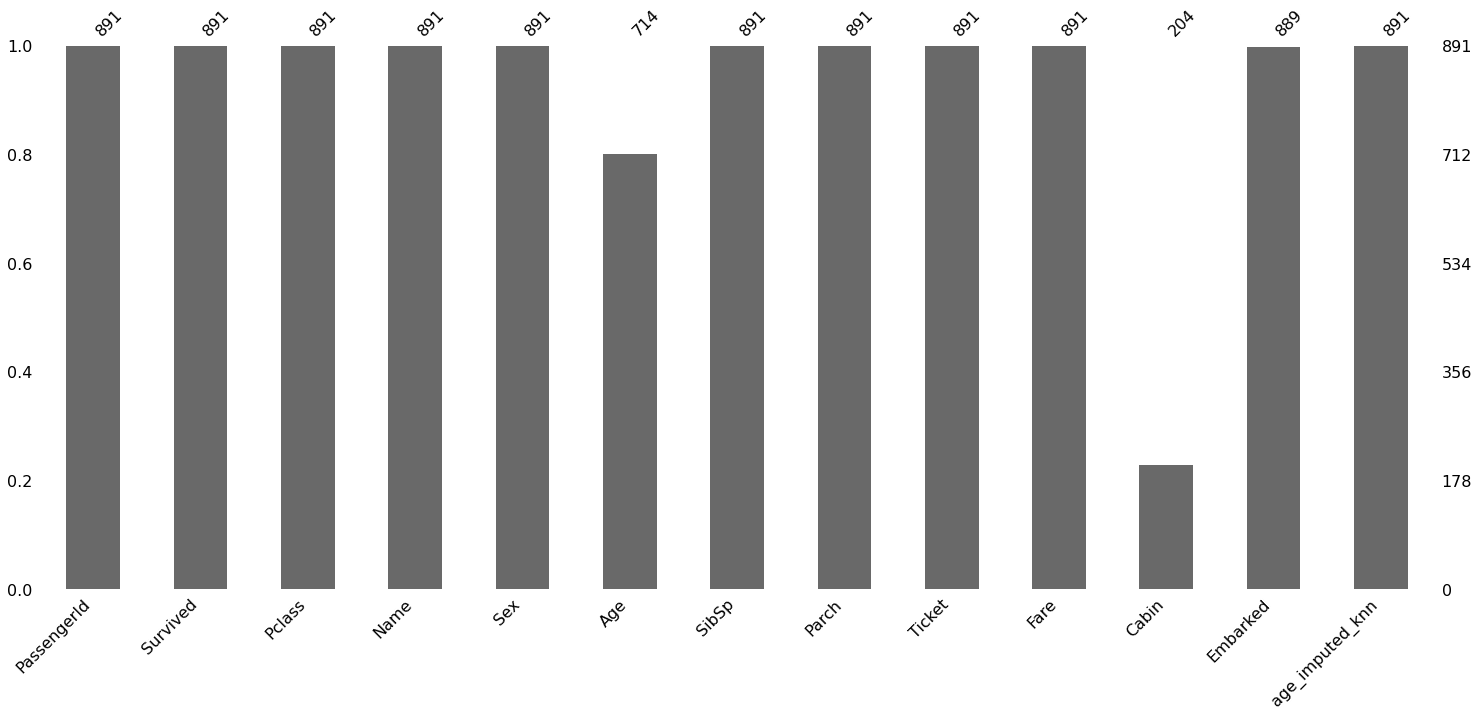

In [73]:
# Veri setindeki eksik olmayan değişken sayısını verir

msno.bar(df)
plt.show()

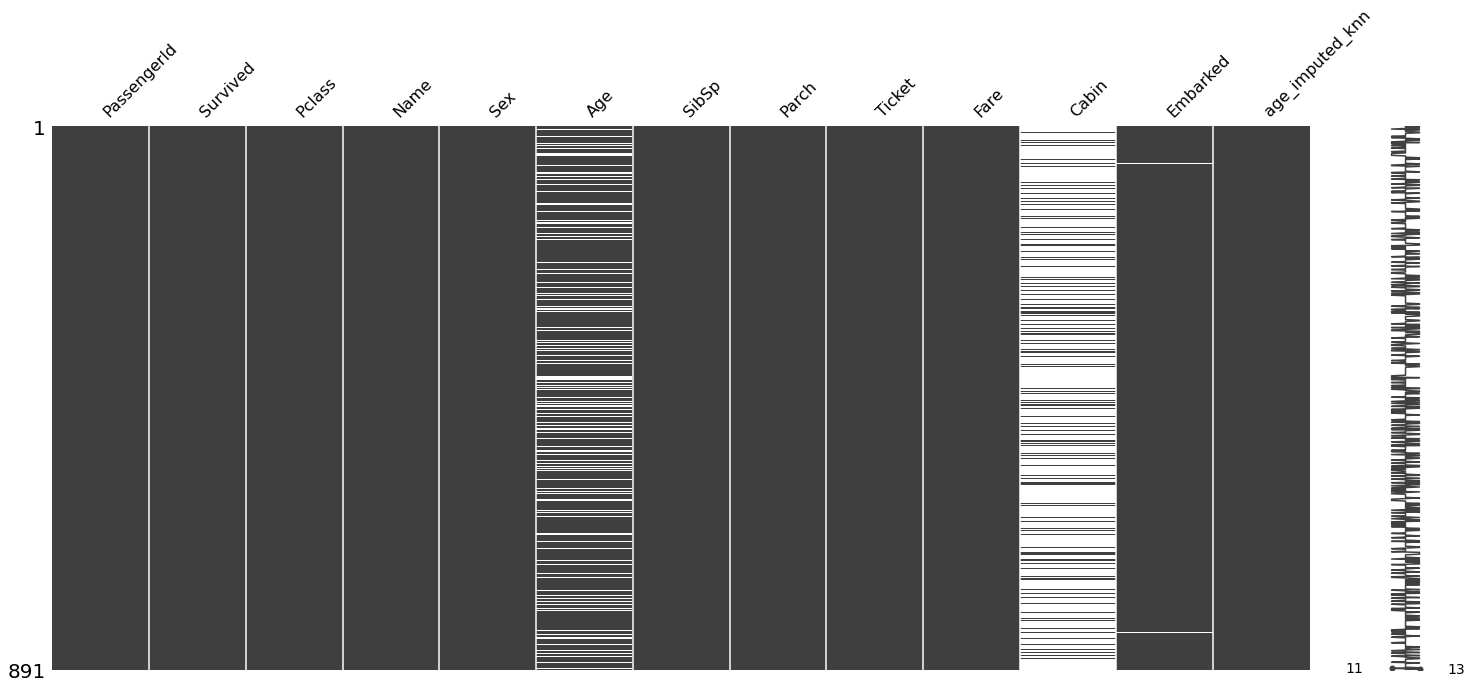

In [74]:
# Eksik değerleri gösterir.
msno.matrix(df)
plt.show()

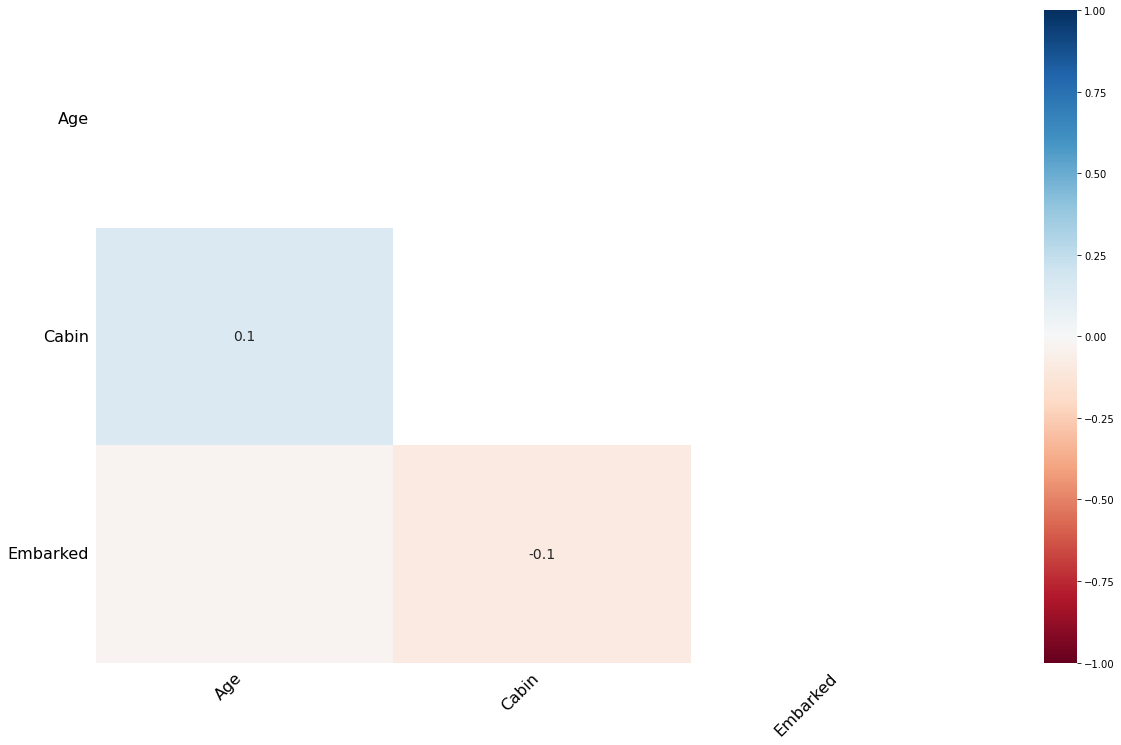

In [75]:
# Eksik değerler arasında korelasyon var mı? Rassallık var mı?
msno.heatmap(df) # Değişkenler arasında bir ilişki yok. (0.1)
plt.show()

## Eksik Değerlerin Bağımlı Değişken ile Analizi

* Elimizdeki değişkenlerin eksik olmasına bağımlı değişken mi sebep oluyor?

In [76]:
na_cols = missing_values_table(df, True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


### Fonksiyonlaştırma

In [77]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col+"_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0) # Eksik ise 1 değilse 0
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                           "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
         
missing_vs_target(df, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2




# Encoding - Scaling

* Encoding; Değişkenlerin temsil şekillerinin değiştirilmesi.

## Label Encoding

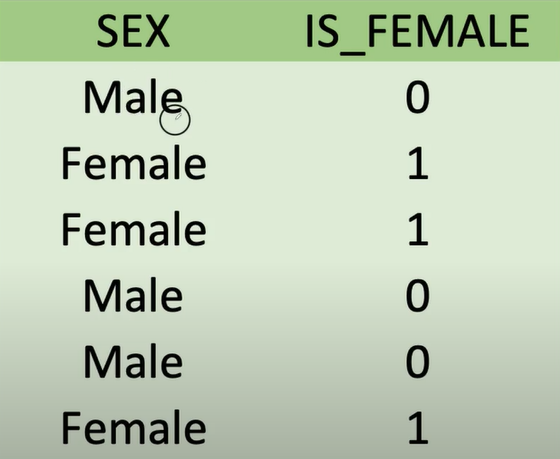

> * Ordinal değişkenler için LabelEncoder kullanılabilir.

In [78]:
df = load()
df.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [79]:
# Nesnemizi oluşturuyoruz.
le = LabelEncoder()
le.fit_transform(df.Sex)[:5]

array([1, 0, 0, 0, 1])

In [80]:
# Hangi rakam hangi değişkeni temsil ediyor?

le.inverse_transform([0, 1]) 
# 0 --> Female 1 --> Male

array(['female', 'male'], dtype=object)

### Fonksiyonlaştırma

In [81]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

df = load()

# 2 Değer içeren kategorik kolonlar hangileri?

binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]
print(binary_cols)

for col in binary_cols:
    label_encoder(df, col)

df.head()

['Sex']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,NaN,S


In [82]:
# Büyük veri setinde fonksiyonumuzu uygulayalım.

df = load_application_train()
df.shape

(307511, 122)

In [83]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]
print(binary_cols)

df[binary_cols].head()

['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']


,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,N,Y,No
1,Cash loans,N,N,No
2,Revolving loans,Y,Y,NaN
3,Cash loans,N,Y,NaN
4,Cash loans,N,Y,NaN


In [84]:
# Fonksiyonumuzu uygulayalım.

for col in binary_cols:
    label_encoder(df, col)

df[binary_cols].head()

# Burada "EMERGENCYSTATE_MODE" değişkeni içerisinde NaN değerler olduğu için 2 ataması yapılmış.
# Bu durumda böyle kalabilir ama NaN değerlere 2 verildiğinin farkında olmak gerekiyor.

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


## One Hot Encoding

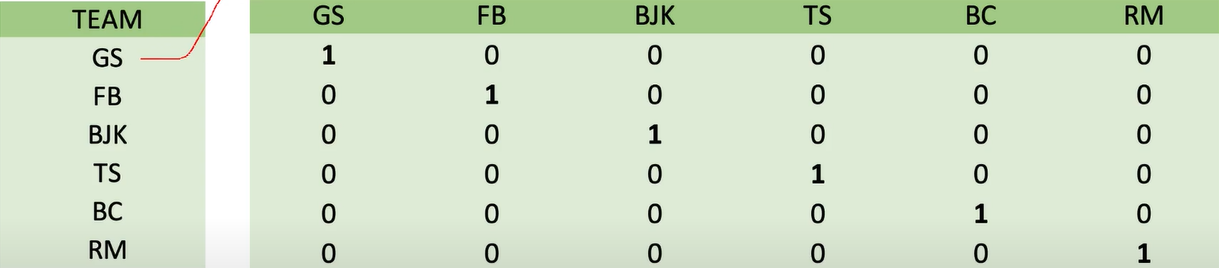

> * Nominal kategorik değişkenler için kullanılır. 
> * Dummy Trap oluşmaması için bir sınıf drop edilir. (Diğer sınıflardan türetilebileceği için) 


In [85]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [86]:
# Nominal kategorik

df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:
# Embarked için OHE yapıyoruz.

pd.get_dummies(df, columns=["Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,1


In [88]:
df.Embarked.isnull().sum()

2

In [89]:
# Embarked için OHE yapıyoruz.
# dummy_na=True ile NaN değerler için de OHE uygular.

pd.get_dummies(df, columns=["Embarked"], dummy_na=True).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,0,0,1,0


In [90]:
# Sex kolonunuda 2 değer olduğu için OHE uygulayıpi drop_first yaparsak LabelEncoding yapmış oluruz.

pd.get_dummies(df, columns=["Sex"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,S,1


In [91]:
# Değişklenlere aynı anda OHE uygulamak

pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000,1,0,A/5 21171,7.250,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000,1,0,PC 17599,71.283,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000,0,0,STON/O2. 3101282,7.925,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000,1,0,113803,53.100,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000,0,0,373450,8.050,NaN,1,0,1


### Fonksiyonlaştırma

In [92]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df=load()

#cat_cols, num_cols, cat_but_car = grab_col_names(df)
#print("\nKategorik değişkenler:", cat_cols)

#OHE yapılacak kolonları ayırıyoruz.
ohe_cols = [col for col in df.columns if 10>=df[col].nunique() > 2]
ohe_cols # Sex ve Survived değişkenlerinden kurtulduk. "Survived" --> Bağımlı değişken "Sex" --> LabelEncoding yapabiliriz

one_hot_encoder(df, ohe_cols).head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.000,A/5 21171,7.250,NaN,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,PC 17599,71.283,C85,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.000,STON/O2. 3101282,7.925,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,113803,53.100,C123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",male,35.000,373450,8.050,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Rare Encoding

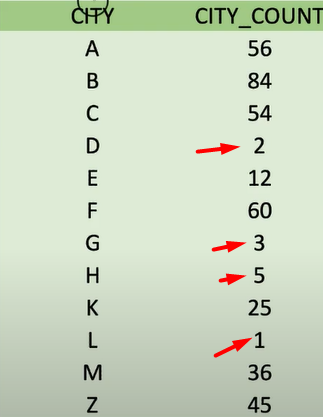

> * "CITY" kolonuna OHE yaptığımızda düşük frekansa sahip değerler içinde kolonlar oluşacaktır.
> * Örneğin 1000 satırlık bir datada sadece 2 satırda "D" sınıfı 1 değerini alacaktır.
> * "D" değişkeni gibi düşük frekanslı sınıfların bağımlı değişken üzerinde bir etkisi olmayacaktır. Kirlilik yaratacaktır.

* Bir threshold belirleyip, bu threshold altında kalan sınıfları bir araya getireceğiz.
* Örneğin; threshold=25 için;
> > 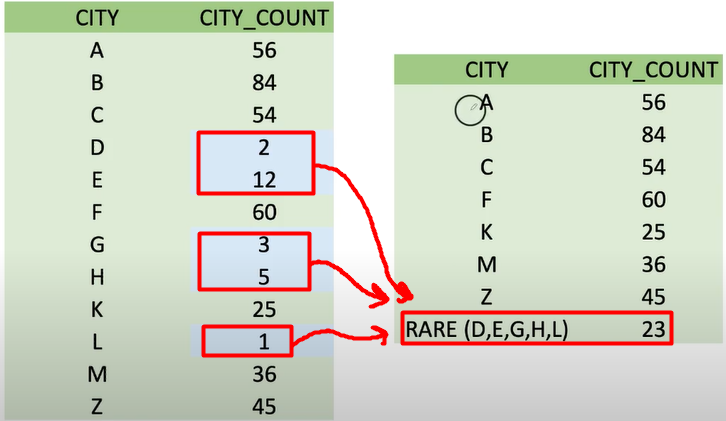

---  
**Rare Encoding Adımları**  

> 1. Kategorik değişkenlerin azlık çokluk durumunun analiz edilmesi. 
> 2. Rare kategoriler ile bağımlı değişken arasındaki ilişkinin analiz edilmesi 
> 3. Rare Encoder kodlama  

---

In [93]:
df = load_application_train()
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [94]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


### - Kategorik değişkenlerin azlık-çokluk durumu

In [95]:
# Kategorik değişkenlerin sınıflarını ve oranlarını getiren fonksiyon

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#" * 25)
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

                 NAME_CONTRACT_TYPE  Ratio
Cash loans                   278232 90.479
Revolving loans               29279  9.521
#########################
     CODE_GENDER  Ratio
F         202448 65.834
M         105059 34.164
XNA            4  0.001
#########################
   FLAG_OWN_CAR  Ratio
N        202924 65.989
Y        104587 34.011
#########################
   FLAG_OWN_REALTY  Ratio
Y           213312 69.367
N            94199 30.633
#########################
                 NAME_TYPE_SUITE  Ratio
Unaccompanied             248526 80.819
Family                     40149 13.056
Spouse, partner            11370  3.697
Children                    3267  1.062
Other_B                     1770  0.576
Other_A                      866  0.282
Group of people              271  0.088
#########################
                      NAME_INCOME_TYPE  Ratio
Working                         158774 51.632
Commercial associate             71617 23.289
Pensioner                        55362 1

### - Rare kategoriler ile bağımlı değişken arasındaki ilişki

In [96]:
df.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [97]:
df.groupby("NAME_INCOME_TYPE").TARGET.mean()

NAME_INCOME_TYPE
Businessman            0.000
Commercial associate   0.075
Maternity leave        0.400
Pensioner              0.054
State servant          0.058
Student                0.000
Unemployed             0.364
Working                0.096
Name: TARGET, dtype: float64

In [98]:
# Fonksiyonlaştırma

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

rare_analyser(df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
      COUNT  RATIO  TARGET_MEAN
F    202448  0.658        0.070
M    105059  0.342        0.101
XNA       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 7
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Group of people     271  0.001        0.085
Other_A             866  0.003        0.088
Other_B            1770  0.006        0.098
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 8
                       COUNT  RATIO  TARGET_MEAN
Businessman               10  0.

### Fonksiyonlaştırma

In [99]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    
    # fonksiya gelen "rare_perc" oranından daha düşük orana sahip kategorik kolonları tut
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == "O"
                   and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])

    return temp_df
    
new_df = rare_encoder(df, 0.01)
rare_analyser(new_df, "TARGET", cat_cols)

NAME_CONTRACT_TYPE : 2
                  COUNT  RATIO  TARGET_MEAN
Cash loans       278232  0.905        0.083
Revolving loans   29279  0.095        0.055


CODE_GENDER : 3
       COUNT  RATIO  TARGET_MEAN
F     202448  0.658        0.070
M     105059  0.342        0.101
Rare       4  0.000        0.000


FLAG_OWN_CAR : 2
    COUNT  RATIO  TARGET_MEAN
N  202924  0.660        0.085
Y  104587  0.340        0.072


FLAG_OWN_REALTY : 2
    COUNT  RATIO  TARGET_MEAN
N   94199  0.306        0.083
Y  213312  0.694        0.080


NAME_TYPE_SUITE : 5
                  COUNT  RATIO  TARGET_MEAN
Children           3267  0.011        0.074
Family            40149  0.131        0.075
Rare               2907  0.009        0.094
Spouse, partner   11370  0.037        0.079
Unaccompanied    248526  0.808        0.082


NAME_INCOME_TYPE : 5
                       COUNT  RATIO  TARGET_MEAN
Commercial associate   71617  0.233        0.075
Pensioner              55362  0.180        0.054
Rare              

## Feature Scaling

* Değişkenleri aynı şartlarda değerlendirmek için gereklidir.

### StandardScaler

* Klasik standartlaştırma. Ortalamayı çıkar, standart sapmaya böl. 
* Z = (x - u) / s

In [100]:
df = load()

# Nesnemizi oluşturuyoruz.
ss = StandardScaler()
df["Age_standard_scaler"] = ss.fit_transform(df[["Age"]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365


### RobustScaler

* Medyanı çıkar IQR'a böl. 
* Ortalama ve Standart sapma outlierslardan etkilendiği için "StandardScaler" a göre daha verimli bir yöntemdir.

In [101]:
rs = RobustScaler()
df["Age_robuts_scaler"] = rs.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909


### MinMaxScaler

* Verilen 2 değer arasında değişken dönüşümü

In [102]:
mms = MinMaxScaler()
df["Age_min_max_scaler"] = mms.fit_transform(df[["Age"]])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000,446.000,257.354,1.000,223.500,446.000,668.500,891.000
Survived,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
Pclass,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
Age,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SibSp,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
Parch,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
Fare,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329
Age_standard_scaler,714.000,0.000,1.001,-2.017,-0.660,-0.117,0.572,3.465
Age_robuts_scaler,714.000,0.095,0.813,-1.543,-0.441,0.000,0.559,2.909
Age_min_max_scaler,714.000,0.368,0.183,0.000,0.248,0.347,0.472,1.000


In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,-0.530,-0.336,0.271
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,0.572,0.559,0.472
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,-0.255,-0.112,0.321
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,0.365,0.392,0.435
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0.365,0.392,0.435


---  

**YAPILAN SCALING ISLEMLERI ILGILI KOLONUN DAGILIMINI ETKILEMEZ....**

---  

### Binning ( Numeric to Categorical)

In [104]:
df["Age_qcut"] = pd.qcut(df["Age"], 5)  # Age değişkenini 5'e böl.

df.Age_qcut.value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age_qcut, dtype: int64

# Feature Extraction ( Özellik Çıkarımı)

* Ham veriden yeni kolonlar üretmektir. 

>> 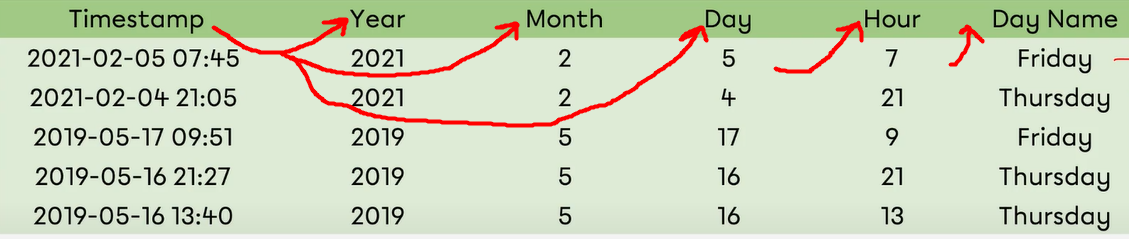

## Binary Features

* Flag, Bool, True-False

In [105]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [106]:
# "Cabin" değişkeninde çok fazla NaN değer var.
# Bunu drop etmek yerine NaN:0 Dolu:1 olacak şekilde doldurup bir incelemek istersek.

df["NEW_CABIN_BOOL"] = df["Cabin"].notnull().astype("int") # dolu değil mi?
df.NEW_CABIN_BOOL[:25]

0     0
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    1
24    0
Name: NEW_CABIN_BOOL, dtype: int32

In [107]:
# Yeni oluşturduğumuz "NEW_CABIN_BOOL" değişkeni bağımlı değişken üzerinde bir bağlantı var mı?

df.groupby("NEW_CABIN_BOOL").agg({"Survived":"mean"})
# Cabin numarası olanların hayatta kalma oranı, Cabin numarası olmayanlara göre çok daha yüksek

,Survived
NEW_CABIN_BOOL,
0,0.300
1,0.667


In [108]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, pvalue = proportions_ztest(count =[df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
                                             df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()],
                                      nobs = [df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
                                              df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# Hipotez = Kabin değeri olanlar (1) ile Olmayanlar (0) arasında bir ilişki yoktur.
# p-value = 0.000 < 0.05 olduğundan H0 reddedilir.
# Yani Kabin değeri olanlar (1) ile Olmayanlar (0) arasında bir ilişki vardır.

Test Stat = 9.4597, p-value = 0.0000


In [109]:
# Sibsp ve Parch değişkenlerinden NEW_IS_ALONE değişkenini türetiyoruz.

df.loc[((df["SibSp"] + df["Parch"]) >0), "NEW_IS_ALONE"] = "NO"
df.loc[((df["SibSp"] + df["Parch"]) == 0), "NEW_IS_ALONE"] = "YES"

df.groupby("NEW_IS_ALONE").agg({"Survived": "mean"})
# Yalnız olanların hayatta kalma oranı daha düşük görünüyor.

,Survived
NEW_IS_ALONE,
NO,0.506
YES,0.304


In [110]:
# Yalnız olanların hayatta kalma oranı daha düşük görünüyor.
# Bu fark anlamlı mı? Bunu hipotezler ile incelersek
test_stat, pvalue = proportions_ztest(count =[df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].sum(),
                                             df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].sum()],
                                      nobs = [df.loc[df["NEW_IS_ALONE"] == "YES", "Survived"].shape[0],
                                              df.loc[df["NEW_IS_ALONE"] == "NO", "Survived"].shape[0]])

print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

# Hipotez = Yalnız olanlar (1) ile Olmayanlar (0) arasında bir ilişki yoktur.
# p-value = 0.000 < 0.05 olduğundan H0 reddedilir.
# Yani Yalnız olmayanlar, yalnızlara göre daha çok hayatta kalmış.

Test Stat = -6.0704, p-value = 0.0000


## Text Features

In [111]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


### Letter Count

In [112]:
df["NEW_NAME_COUNT"] = df["Name"].str.len()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24


### Word Count

In [113]:
df["NEW_NAME_WORD_COUNT"] = df["Name"].apply(lambda x: len(str(x).split(" ")))
df.head()
                                             

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4


### Özel Yapıları Yakalamak

In [114]:
# Name içerisinde Dr. ünvanı bulunanlara 1 diğerlerine 0 yaz.

df["NEW_NAME_DR"] = df["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
df[df["NEW_NAME_DR"] > 0].shape

(10, 15)

In [115]:
# Sayısı az olmasına rağmen Doktor olanların olmayanlara göre hayatta kalma oranı oldukça yüksek.

df.groupby("NEW_NAME_DR").agg({"Survived": ["mean", "count"]})


Survived      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

## Regex Features

In [116]:
df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [117]:
# "Name" kolonunda kişilerin tag'leri " Mrs." şeklinde tutuluyor. (boşluk-tag-.)
# Buna göre regex yapacağız.

df["NEW_TITLE"] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.NEW_TITLE[:25]

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
20        Mr
21        Mr
22      Miss
23        Mr
24      Miss
Name: NEW_TITLE, dtype: object

In [134]:
df[["NEW_TITLE", "Survived", "Age"]].groupby(["NEW_TITLE"]).agg({"Survived": "mean", "Age":["count", "mean"]})

# Elde ettiğimiz Title'lara göre eksik yaş değişkenlerini kendi ortalamaları ile doldurmanın daha mantıklı olacağını anlamış olduk.

Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

## Date Features

In [136]:
dff = pd.read_csv("course_reviews.csv")
dff.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [137]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              4323 non-null   float64
 1   Timestamp           4323 non-null   object 
 2   Enrolled            4323 non-null   object 
 3   Progress            4323 non-null   float64
 4   Questions Asked     4323 non-null   float64
 5   Questions Answered  4323 non-null   float64
dtypes: float64(4), object(2)
memory usage: 202.8+ KB


In [140]:
# Timestamp kolonunun tipi object bunu datetime haline getiriyoruz.

dff["Timestamp"] = pd.to_datetime(dff["Timestamp"], format="%Y-%m-%d")
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rating              4323 non-null   float64       
 1   Timestamp           4323 non-null   datetime64[ns]
 2   Enrolled            4323 non-null   object        
 3   Progress            4323 non-null   float64       
 4   Questions Asked     4323 non-null   float64       
 5   Questions Answered  4323 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 202.8+ KB


In [142]:
# Datetime kolonu üzerinden değişkenler türetelim.

dff["year"] = dff["Timestamp"].dt.year # Yıl
dff["month"] = dff["Timestamp"].dt.month # Ay
dff["year_diff"] = date.today().year - dff["Timestamp"].dt.year # Günümüz - Tarih

# month diff: yıl farkı + ay farkı
dff["month_diff"] = (date.today().year - dff["Timestamp"].dt.year)*12+date.today().month - dff["Timestamp"].dt.month

# Day name
dff["day_name"] = dff["Timestamp"].dt.day_name()
dff.head(8)

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,month_diff,day_name
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,1,17,Friday
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,1,17,Thursday
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,1,17,Thursday
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,1,17,Thursday
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,1,17,Thursday
5,4.000,2021-02-04 12:42:36,2021-02-01 15:40:13,1.000,0.000,0.000,2021,2,1,17,Thursday
6,5.000,2021-02-04 12:25:30,2020-11-30 19:23:54,85.000,0.000,4.000,2021,2,1,17,Thursday
7,4.500,2021-02-04 11:13:15,2021-01-08 08:05:42,10.000,0.000,0.000,2021,2,1,17,Thursday


## Feature Interaction (Özellik Etkileşimleri)

In [143]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [145]:
# Yaşı büyük veya küçük olanların yolculuk sınıflarına göre refah durumları arasında bir ilişki var mı?

df["NEW_AGE_PCLASS"] = df["Age"] * df["Pclass"]

# Akrabalık sayılarının toplamı + kişinin kendisi: NEW_FAMILIY_SIZE

df["NEW_FAMILIY_SIZE"] = df["SibSp"] + df["Parch"] + 1

# Cinsiyet ve yaş kırılımına göre yeni bir değişken oluşturuyoruz: NEW_SEX_CAT

df.loc[(df["Sex"] == "male") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngmale"
df.loc[(df["Sex"] == "male") & ((df["Age"] > 21) & (df["Age"]) <=50), "NEW_SEX_CAT"] = "maturemale"
df.loc[(df["Sex"] == "male") & (df["Age"] > 50), "NEW_SEX_CAT"] = "seniormale"

df.loc[(df["Sex"] == "female") & (df["Age"] <= 21), "NEW_SEX_CAT"] = "youngfemale"
df.loc[(df["Sex"] == "female") & ((df["Age"] > 21) & (df["Age"]) <=50), "NEW_SEX_CAT"] = "maturefemale"
df.loc[(df["Sex"] == "female") & (df["Age"] > 50), "NEW_SEX_CAT"] = "seniorfemale"

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_AGE_PCLASS,NEW_FAMILIY_SIZE,NEW_SEX_CAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,66.000,2,maturemale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,38.000,2,maturefemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,78.000,1,maturefemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,35.000,2,maturefemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,105.000,1,maturemale


In [146]:
# "Sex" ve "Age" üzerinden oluşturduğumuz "NEW_SEX_CAT" değişkeni bir şey ifade ediyor mu?,

df.groupby("NEW_SEX_CAT")["Survived"].mean() # maturefemale sınıfının hayatta kalma oranı oldukça yüksek.

NEW_SEX_CAT
maturefemale   0.731
maturemale     0.194
seniorfemale   0.941
seniormale     0.128
Name: Survived, dtype: float64

# Uygulama

In [147]:
df = load()
df.shape

(891, 12)

In [148]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [149]:
# Değişken isimlerini tek bir format haline getirelim.

df.columns = [col.upper() for col in df.columns]
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


## Adım 1: Feature Engineering

In [179]:
df = load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [180]:
df.shape

(891, 12)

In [181]:
df.columns = [col.upper() for col in df.columns]

In [182]:
# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')
# Name count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))
# name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df.head()
df.shape

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if "PASSENGERID" not in col]

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [183]:
df.shape

(891, 22)

---  

* **12 DEĞİŞKENLİ DATAMIZI 22 DEĞİŞKENE ÇIKARDIK.** 

---

## Adım 2: Outliers

In [184]:
for col in num_cols:
    print(col, check_outlier(df, col))

print("#"*25)
for col in num_cols:
    replace_with_thresholds(df, col)
print("#"*25)
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True
#########################
#########################
AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


## Adım 3: Missing Values

In [185]:
missing_values_table(df)

                n_miss  ratio
CABIN              687 77.100
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [186]:
# missing_values_table(df)

df.drop("CABIN", inplace=True, axis=1)

remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

# Name üzerinden elde ettiğimiz NEW_TITLE'a göre "AGE" değişkenimizin eksik değerlerini dolduruyoruz.
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))


df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'


df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [187]:
missing_values_table(df) # Eksik değerden kurtulduk.

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


## Adım 4: Label Encoding

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PASSENGERID          891 non-null    int64  
 1   SURVIVED             891 non-null    int64  
 2   PCLASS               891 non-null    int64  
 3   SEX                  891 non-null    object 
 4   AGE                  891 non-null    float64
 5   SIBSP                891 non-null    int64  
 6   PARCH                891 non-null    int64  
 7   FARE                 891 non-null    float64
 8   EMBARKED             891 non-null    object 
 9   NEW_CABIN_BOOL       891 non-null    int32  
 10  NEW_NAME_COUNT       891 non-null    int64  
 11  NEW_NAME_WORD_COUNT  891 non-null    int64  
 12  NEW_NAME_DR          891 non-null    int64  
 13  NEW_TITLE            891 non-null    object 
 14  NEW_FAMILY_SIZE      891 non-null    int64  
 15  NEW_AGE_PCLASS       891 non-null    flo

In [195]:
# İki sınıflı kategorik değişkenleri tut ve uygula

binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [196]:
binary_cols

['SEX', 'NEW_IS_ALONE']

In [197]:
df.head(11)

,PASSENGERID,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE,NEW_AGE_CAT,NEW_SEX_CAT
0,1,0,3,1,22.000,1,0,7.250,S,0,23,4,0,Mr,2,66.000,0,mature,maturemale
1,2,1,1,0,38.000,1,0,65.634,C,1,45,7,0,Mrs,2,38.000,0,mature,maturefemale
2,3,1,3,0,26.000,0,0,7.925,S,0,22,3,0,Miss,1,78.000,1,mature,maturefemale
3,4,1,1,0,35.000,1,0,53.100,S,1,44,7,0,Mrs,2,35.000,0,mature,maturefemale
4,5,0,3,1,35.000,0,0,8.050,S,0,24,4,0,Mr,1,105.000,1,mature,maturemale
5,6,0,3,1,30.000,0,0,8.458,Q,0,16,3,0,Mr,1,90.000,1,mature,maturemale
6,7,0,1,1,54.000,0,0,51.862,S,1,23,4,0,Mr,1,54.000,1,mature,seniormale
7,8,0,3,1,2.000,3,1,21.075,S,0,30,4,0,Master,5,6.000,0,young,youngmale
8,9,1,3,0,27.000,0,2,11.133,S,0,45,7,0,Mrs,3,81.000,0,mature,maturefemale
9,10,1,2,0,14.000,1,0,30.071,C,0,35,5,0,Mrs,2,28.000,0,young,youngfemale


## Adım 5: Rare Encoding

In [199]:
rare_analyser(df, "SURVIVED", cat_cols)


df = rare_encoder(df, 0.01)

df["NEW_TITLE"].value_counts()

SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


NEW_TITLE : 17
          COUNT  RATIO  TARGET_MEAN
Capt          1  0.001        0.000
Col           2  0.002        0.500
Countess      1  0.001        1.000
Don           1  0.001        0.000
Dr            7  0.008        0.429
Jonkheer      1  0.001        0.000
Lady          1  0.001        1.000
Major         2  0.002        0.500
Master       40  0.045        0.575
Miss        182  0.204        0.698
Mlle          2  0.002        1.000
Mme           1  0.001        1.000
Mr          517  0.580        0.157
Mrs         125  0.140        0.792
Ms            1  0.001        1.000
Rev           6  0.007        0.000
Sir           1  0.001        1.000


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


N

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

## Adım 6: OneHotEncoding

In [200]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

df.head()
df.shape


cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if "PASSENGERID" not in col]

rare_analyser(df, "SURVIVED", cat_cols)

useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

# df.drop(useless_cols, axis=1, inplace=True)

Observations: 891
Variables: 52
cat_cols: 47
num_cols: 5
cat_but_car: 0
num_but_cat: 47
SURVIVED : 2
   COUNT  RATIO  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


NEW_CABIN_BOOL : 2
   COUNT  RATIO  TARGET_MEAN
0    687  0.771        0.300
1    204  0.229        0.667


NEW_NAME_DR : 2
   COUNT  RATIO  TARGET_MEAN
0    881  0.989        0.383
1     10  0.011        0.500


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


PCLASS_2 : 2
   COUNT  RATIO  TARGET_MEAN
0    707  0.793        0.361
1    184  0.207        0.473


PCLASS_3 : 2
   COUNT  RATIO  TARGET_MEAN
0    400  0.449        0.557
1    491  0.551        0.242


SIBSP_1 : 2
   COUNT  RATIO  TARGET_MEAN
0    682  0.765        0.337
1    209  0.235        0.536


SIBSP_2 : 2
   COUNT  RATIO  TARGET_MEAN
0    863  0.969        0.381
1     28  0.031    

In [201]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.000,7.250,0,23,0,66.000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,38.000,65.634,1,45,0,38.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,26.000,7.925,0,22,0,78.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,35.000,53.100,1,44,0,35.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,35.000,8.050,0,24,0,105.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [203]:
df.shape

(891, 52)

## Adım 7: Standartlaştırma

In [204]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

df.shape

(891, 52)

In [205]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.561,-0.821,0,-0.437,0,0.066,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0.663,2.032,1,2.248,0,-0.790,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,-0.255,-0.788,0,-0.559,0,0.434,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0.434,1.419,1,2.126,0,-0.882,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0.434,-0.781,0,-0.315,0,1.260,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Model

In [209]:
y = df["SURVIVED"]
X = df.drop(["PASSENGERID", "SURVIVED"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.8059701492537313

In [207]:
#############################################
# Hiç bir işlem yapılmadan elde edilecek skor?
#############################################

dff = load()
dff.dropna(inplace=True)
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)
y = dff["Survived"]
X = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7090909090909091

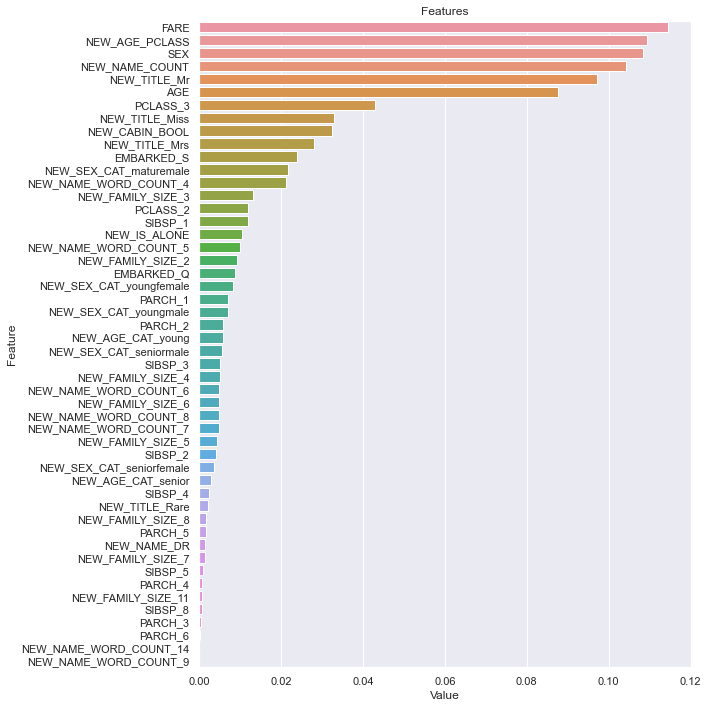

In [210]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)